# BA305 Final Project - Bank Marketing

Team A1: Ze Song, Mandy Zhao, Adrian Lin, Chi Hin Nathan Chang\
Topic: Customer subscription behavior for term deposit products (financial sector) \
Dataset Source: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

## Dataset Intro

The Bank Marketing dataset contains over 40,000 records and 21 variables collected from a Portuguese bank’s direct marketing campaigns. It includes customer demographics, financial information, campaign interactions, and macroeconomic indicators. The goal is to predict whether a client subscribes to a term deposit, making this dataset a strong resource for exploring predictive analytics and customer behavior in financial services.

## Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/BA305 Project/bank-additional-full.csv'
df = pd.read_csv(file_path,delimiter=';')
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


## Exploratory Data Analysis

In [ ]:
# Sanity Check
if len(df) > 40000:
  print("Chi Hin Nathan Chang got imported back to Hong Kong SAR now😢")

Chi Hin Nathan Chang got imported back to Hong Kong SAR now😢


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Dimensions & structure
print("Shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

# Missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Target distribution
print("\nTarget variable distribution:")
print(df['y'].value_counts(normalize=True) * 100)

Shape: (41188, 21)

Column types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         

In [ ]:
# Distinguish numerical and categorical variables
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

# Descriptives for numeric variables
desc_num = df[num_cols].describe().T
desc_num

Numeric: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## EDA Stage Visualizations

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams.update({
    "figure.figsize": (8,5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

####1. Target Variable Distribution

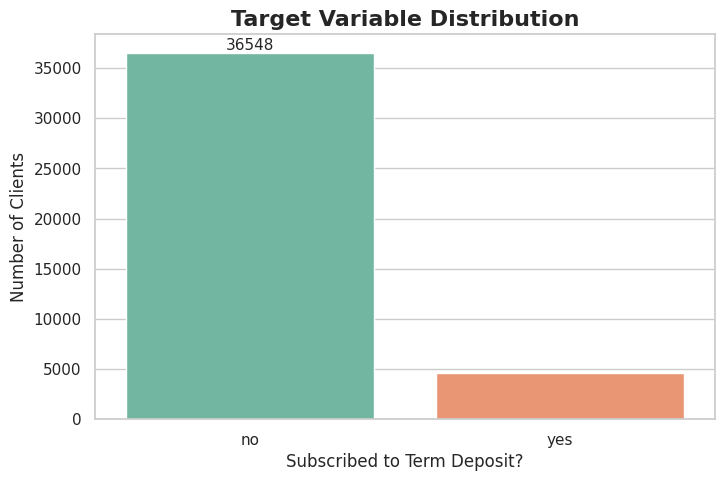

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='y', data=df, ax=ax, palette="Set2")
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=11)
plt.title("Target Variable Distribution", fontsize=16, weight='bold')
plt.xlabel("Subscribed to Term Deposit?")
plt.ylabel("Number of Clients")
plt.show()

#### 2. Age Vs. Subscription

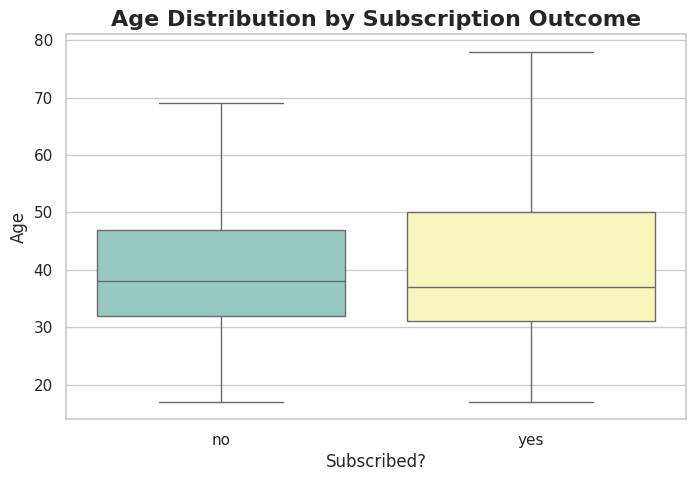

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x='y', y='age', data=df, palette="Set3", showfliers=False, ax=ax)
plt.title("Age Distribution by Subscription Outcome", fontsize=16, weight='bold')
plt.xlabel("Subscribed?")
plt.ylabel("Age")
plt.show()

#### 3. Campaign Vs. Subscription

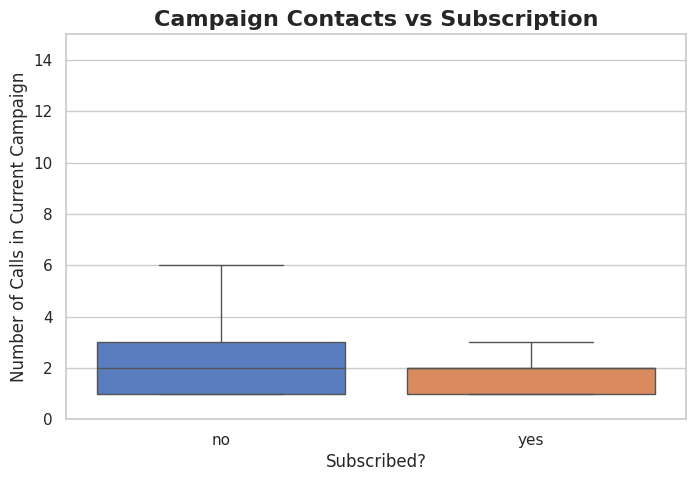

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x='y', y='campaign', data=df, palette="muted", showfliers=False, ax=ax)
plt.ylim(0, 15)  # focus on main range
plt.title("Campaign Contacts vs Subscription", fontsize=16, weight='bold')
plt.xlabel("Subscribed?")
plt.ylabel("Number of Calls in Current Campaign")
plt.show()

#### 4. Jobs Vs. Subscription

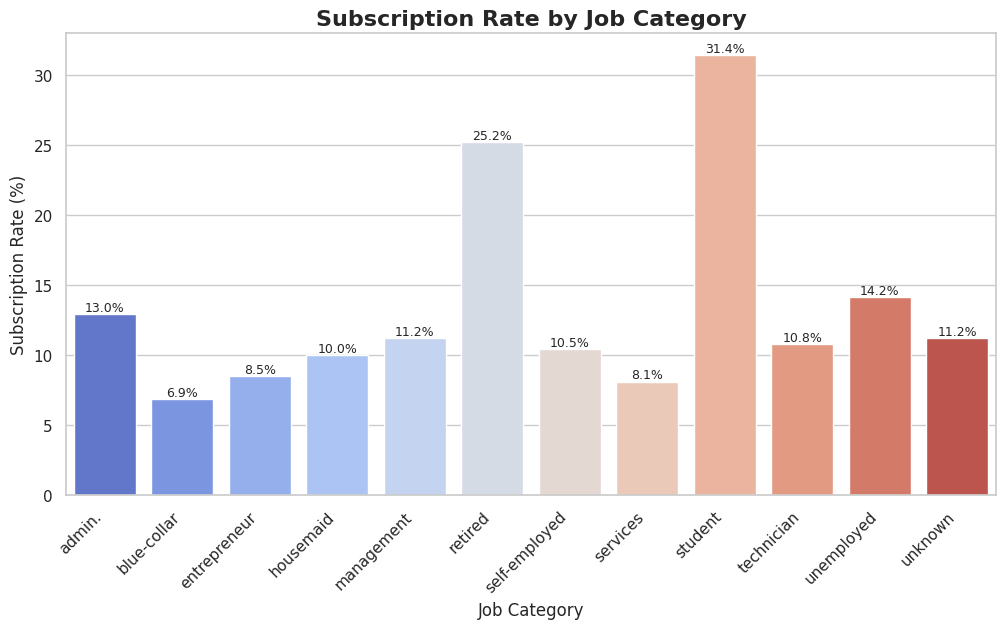

In [ ]:
job_subs = pd.crosstab(df['job'], df['y'], normalize='index') * 100
job_subs = job_subs.reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='job', y='yes', data=job_subs, palette="coolwarm", ax=ax)
plt.title("Subscription Rate by Job Category", fontsize=16, weight='bold')
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Job Category")
plt.xticks(rotation=45, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=9)
plt.show()

#### 5. Education Vs. Subscription

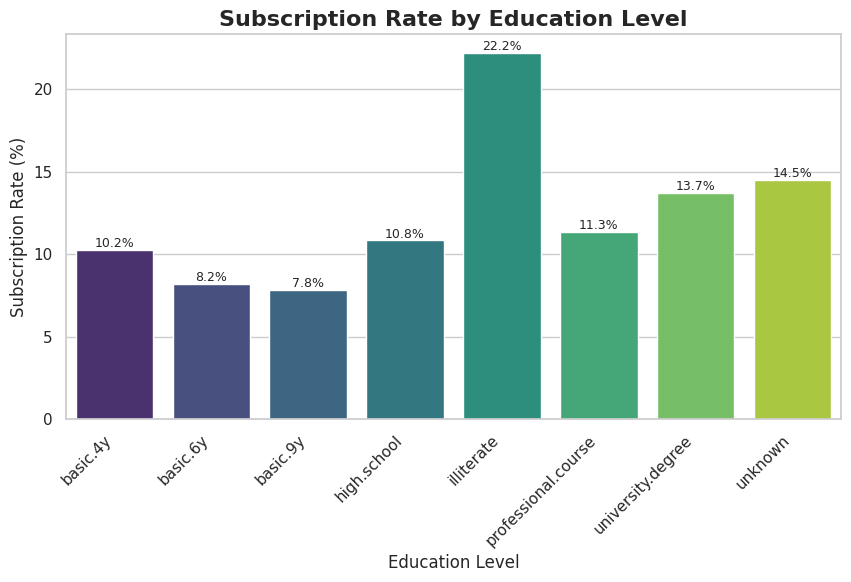

In [ ]:
edu_subs = pd.crosstab(df['education'], df['y'], normalize='index') * 100
edu_subs = edu_subs.reset_index()

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='education', y='yes', data=edu_subs, palette="viridis", ax=ax)
plt.title("Subscription Rate by Education Level", fontsize=16, weight='bold')
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Education Level")
plt.xticks(rotation=45, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=9)
plt.show()

#### 6. Correlation HeatMap for Numerical Variables

In [ ]:
rename_map = {
    "age": "Age",
    "campaign": "# Contacts in Campaign",
    "pdays": "Days Since Last Contact",
    "previous": "# Previous Contacts",
    "emp.var.rate": "Employment Variation Rate",
    "cons.price.idx": "Consumer Price Index",
    "cons.conf.idx": "Consumer Confidence Index",
    "euribor3m": "3-Month Euribor Rate",
    "nr.employed": "Number of Employees",
    "prev_contacted": "Previously Contacted Flag"
}


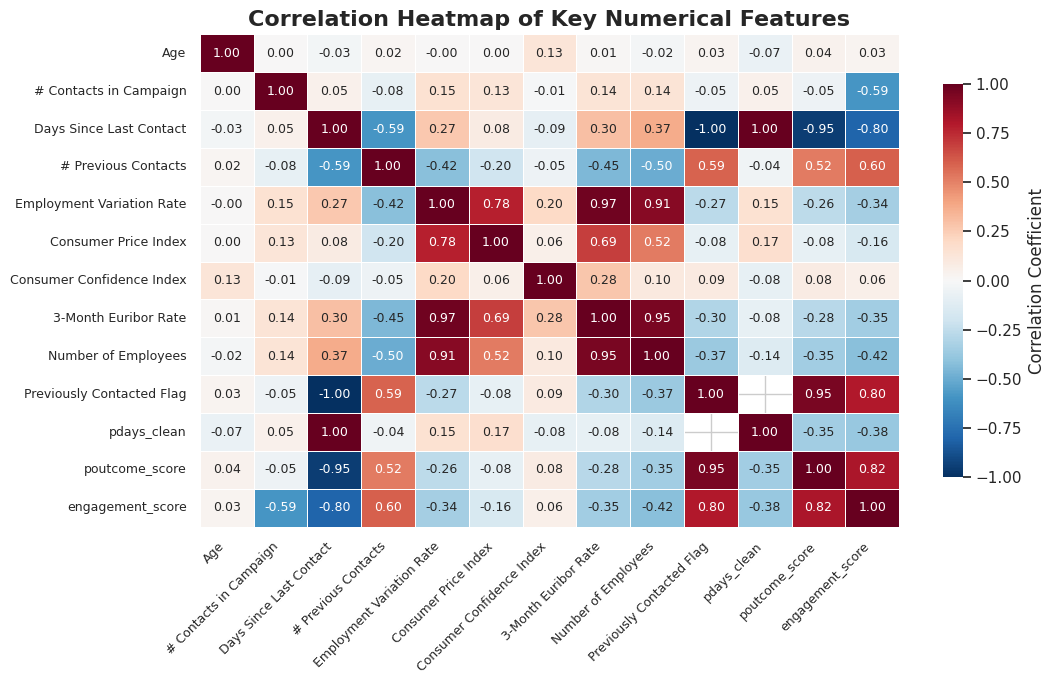

In [ ]:
plt.figure(figsize=(11,7))

# Compute correlation
corr = df.corr(numeric_only=True).rename(index=rename_map, columns=rename_map).round(2)

sns.heatmap(
    corr,
    cmap="RdBu_r",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size":9},
    linewidths=0.4,
    cbar_kws={"shrink":0.8, "label":"Correlation Coefficient"}
)

plt.title("Correlation Heatmap of Key Numerical Features", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


#### 7. Financial Backgrounds Vs. Subscription

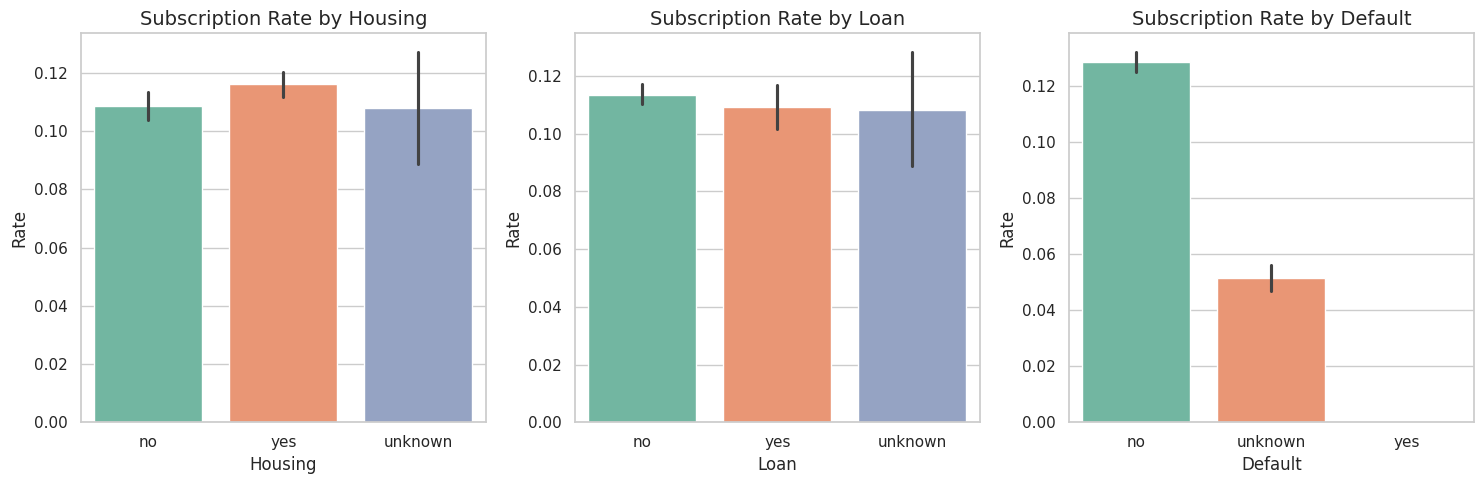

In [ ]:
loan_cols = ['housing', 'loan', 'default']
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, col in enumerate(loan_cols):
    sns.barplot(x=col, y='target', data=df.assign(target=(df['y']=='yes').astype(int)), ax=axes[i], palette="Set2")
    axes[i].set_title(f"Subscription Rate by {col.capitalize()}")
    axes[i].set_ylabel("Rate")
    axes[i].set_xlabel(col.capitalize())

plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
# Drop 'duration' as it will causes data leakages
# Create a new binary feature for “previously contacted” and clean up pdays
df = df.drop(columns=['duration'])

# Flag for whether previously contacted
df['prev_contacted'] = (df['pdays'] != 999).astype(int)

# Replace 999 with NaN (or 0 if you prefer) so it's usable as a numeric variable
df['pdays_clean'] = df['pdays'].replace(999, np.nan)

In [ ]:
# Combine campaign, previous, poutcome into a summary measure of client engagement.
def map_poutcome(x):
    if x == 'success':
        return 1.0
    if x in ('failure', 'nonexistent'):
        return 0.0
    return 0.5  # treat 'unknown' as neutral

df['poutcome_score'] = df['poutcome'].map(map_poutcome)

df['engagement_score'] = (
    df['poutcome_score'] +
    0.1*df['previous'] -
    0.05*df['campaign']
)

In [ ]:
#	Add one-Hot Encoding for categorical features.
# Keep "unknown" as its own category
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols.remove('y')  # exclude target

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)

In [ ]:
# Binary encode y for modeling
df_encoded['target'] = (df['y'] == 'yes').astype(int)

In [ ]:
# Train Test Split
X = df_encoded.drop(columns=['y','target'])
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)